In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
categorized_paths = {'cat': [], 'dog': []}
folder_path=r'E:\train'

# List all files in the folder
for filename in os.listdir(folder_path):
    if filename.startswith('cat'):
        categorized_paths['cat'].append(os.path.join(folder_path, filename))
    elif filename.startswith('dog'):
        categorized_paths['dog'].append(os.path.join(folder_path, filename))
        
print(len(categorized_paths['dog']))
len(categorized_paths['cat'])

9000


9000

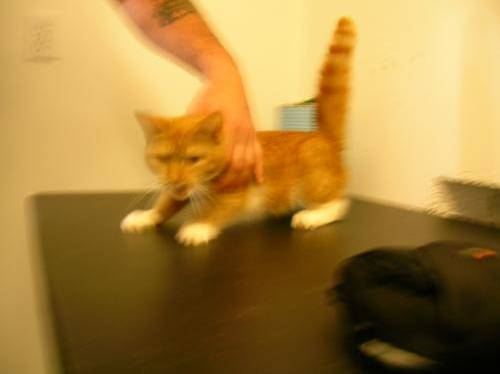

In [3]:
PIL.Image.open(categorized_paths['cat'][0])

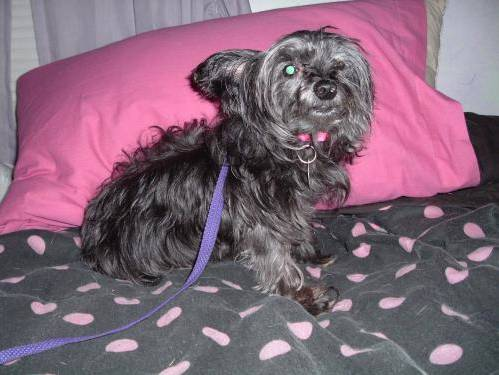

In [4]:
PIL.Image.open(categorized_paths['dog'][0])

In [5]:
img = cv2.imread(categorized_paths['dog'][0])
img

array([[[124, 113, 115],
        [127, 116, 118],
        [130, 117, 119],
        ...,
        [141, 131, 131],
        [139, 131, 131],
        [139, 131, 131]],

       [[125, 114, 116],
        [127, 116, 118],
        [130, 117, 119],
        ...,
        [143, 133, 133],
        [141, 133, 133],
        [141, 133, 133]],

       [[126, 115, 117],
        [128, 117, 119],
        [131, 118, 120],
        ...,
        [145, 135, 135],
        [143, 135, 135],
        [143, 135, 135]],

       ...,

       [[ 77,  73,  68],
        [ 81,  77,  72],
        [ 83,  79,  74],
        ...,
        [ 85,  83,  73],
        [ 84,  82,  72],
        [ 83,  81,  71]],

       [[ 75,  71,  66],
        [ 77,  73,  68],
        [ 77,  73,  68],
        ...,
        [ 77,  75,  65],
        [ 77,  75,  65],
        [ 78,  76,  66]],

       [[ 74,  70,  65],
        [ 75,  71,  66],
        [ 74,  70,  65],
        ...,
        [ 76,  74,  64],
        [ 76,  74,  64],
        [ 76,  74,  64]]

In [6]:
img.shape

(375, 499, 3)

In [7]:
img_resized=cv2.resize(img,(180,180))

In [8]:
animal_labels_dict = {
    'cat': 0,
    'dog': 1,
}

In [9]:
x=[]
y=[]


for label, images in categorized_paths.items():
    for image in images:
        img = cv2.imread(image)
        resized_img = cv2.resize(img, (100, 100))
        #normalized_img = resized_img / 255.0
        x.append(resized_img)  
        y.append(animal_labels_dict[label])        

In [10]:
X = np.array(x)
y = np.array(y)

In [11]:

X.shape

(18000, 100, 100, 3)

In [12]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [13]:
X

array([[[[ 88, 165, 204],
         [ 94, 171, 210],
         [ 97, 174, 213],
         ...,
         [128, 209, 246],
         [122, 206, 246],
         [123, 202, 241]],

        [[ 88, 165, 204],
         [ 94, 171, 210],
         [ 97, 174, 213],
         ...,
         [131, 212, 247],
         [126, 207, 245],
         [124, 203, 242]],

        [[ 88, 165, 204],
         [ 94, 171, 210],
         [ 97, 174, 213],
         ...,
         [138, 215, 248],
         [128, 208, 245],
         [126, 205, 244]],

        ...,

        [[ 54, 125, 159],
         [ 56, 127, 161],
         [ 59, 130, 164],
         ...,
         [  0,   4,   3],
         [  0,   4,   3],
         [  0,   2,   2]],

        [[ 57, 124, 157],
         [ 57, 127, 157],
         [ 61, 129, 162],
         ...,
         [  1,   3,   3],
         [  1,   3,   3],
         [  1,   3,   3]],

        [[ 54, 121, 152],
         [ 56, 123, 154],
         [ 60, 127, 158],
         ...,
         [  0,   2,   2],
        

# modeling

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [15]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255
X_validation_scaled = X_validation /255

In [22]:
from tensorflow.keras import regularizers
num_classes = 2

modell = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=( 100, 100, 3), kernel_regularizer=regularizers.l2(0.001)),       # 16 mens 16 filters and 3 BY 3 the size of evry filter and "same" means activate padding
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.Dense(1, activation='sigmoid') 
                                   
                ])

modell.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
              
modell.fit(X_train, y_train, validation_data=(X_validation_scaled, y_validation), batch_size=32, epochs=10)  

Epoch 1/10
338/338 [==============================] - 50s 139ms/step - loss: 1.4582 - accuracy: 0.5813 - val_loss: 0.8297 - val_accuracy: 0.5033
Epoch 2/10
338/338 [==============================] - 41s 121ms/step - loss: 0.7120 - accuracy: 0.6941 - val_loss: 0.8166 - val_accuracy: 0.5033
Epoch 3/10
338/338 [==============================] - 42s 126ms/step - loss: 0.6227 - accuracy: 0.7575 - val_loss: 0.8138 - val_accuracy: 0.5033
Epoch 4/10
338/338 [==============================] - 46s 136ms/step - loss: 0.5635 - accuracy: 0.7909 - val_loss: 0.8208 - val_accuracy: 0.5033
Epoch 5/10
338/338 [==============================] - 44s 130ms/step - loss: 0.5096 - accuracy: 0.8168 - val_loss: 0.8343 - val_accuracy: 0.5033
Epoch 6/10
338/338 [==============================] - 45s 133ms/step - loss: 0.4719 - accuracy: 0.8381 - val_loss: 0.8384 - val_accuracy: 0.5033
Epoch 7/10
338/338 [==============================] - 47s 138ms/step - loss: 0.4385 - accuracy: 0.8531 - val_loss: 0.8502 - val_ac

In [19]:
num_classes = 2

# Define the model
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(100, 100, 3), kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, validation_data=(X_validation_scaled, y_validation), batch_size=32, epochs=10)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Loss: {test_loss}, Accuracy: {test_accuracy}")


Epoch 1/10
338/338 [==============================] - 127s 342ms/step - loss: 0.9447 - accuracy: 0.6206 - val_loss: 1.1072 - val_accuracy: 0.5663
Epoch 2/10
338/338 [==============================] - 94s 279ms/step - loss: 0.7823 - accuracy: 0.6969 - val_loss: 1.1831 - val_accuracy: 0.6515
Epoch 3/10
338/338 [==============================] - 94s 278ms/step - loss: 0.7104 - accuracy: 0.7409 - val_loss: 0.7124 - val_accuracy: 0.7678
Epoch 4/10
338/338 [==============================] - 91s 269ms/step - loss: 0.6650 - accuracy: 0.7656 - val_loss: 0.6847 - val_accuracy: 0.7596
Epoch 5/10
338/338 [==============================] - 90s 265ms/step - loss: 0.6377 - accuracy: 0.7842 - val_loss: 0.7773 - val_accuracy: 0.7181
Epoch 6/10
338/338 [==============================] - 92s 272ms/step - loss: 0.6327 - accuracy: 0.7940 - val_loss: 1.4005 - val_accuracy: 0.6059
Epoch 7/10
338/338 [==============================] - 95s 281ms/step - loss: 0.6029 - accuracy: 0.8067 - val_loss: 0.7360 - val_a

In [ ]:
y_pred_prob = model.predict(X_test_scaled)

y_pred = np.argmax(y_pred_prob, axis=1)

# Compare with y_test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy on test set: {accuracy}")

# Optionally, you can also evaluate using model.evaluate() method
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

141/141 [==============================] - 8s 58ms/step
Accuracy on test set: 0.48644444444444446
101/141 [====================>.........] - ETA: 2s - loss: 0.7988 - accuracy: 0.7571

In [ ]:
tf.keras.models.save_model(model,'CAT_DOG_model.keras')

# transform into pandas dataframe

In [10]:
df=pd.DataFrame(flat_data)  
df['Target']=target 
df

,0,1,2,3,4,5,6,7,8,9,...,58791,58792,58793,58794,58795,58796,58797,58798,58799,Target
0,87,164,203,93,170,208,93,170,209,97,...,0,2,2,0,2,2,0,2,2,cat
1,41,45,40,44,45,41,48,45,41,50,...,33,40,55,29,37,50,26,35,45,cat
2,43,34,30,27,16,11,40,28,24,60,...,4,193,194,6,186,188,3,168,173,cat
3,217,223,222,219,224,223,219,224,223,218,...,209,211,213,206,212,215,211,211,217,cat
4,75,112,140,75,112,140,79,116,144,81,...,69,97,108,60,85,97,54,78,90,cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,106,143,147,108,145,149,109,146,150,108,...,134,169,179,135,170,180,135,170,180,dog
24996,87,116,147,42,71,100,37,66,94,71,...,74,103,124,59,86,107,45,69,91,dog
24997,44,47,52,48,51,56,35,38,43,38,...,56,89,110,123,167,210,108,148,191,dog
24998,252,255,253,253,253,253,249,247,252,244,...,115,114,130,107,106,122,116,115,131,dog


In [11]:
#pixel_columns = df.columns[:-1]  # Exclude the 'Target' column
#df[pixel_columns] = df[pixel_columns] / 255.0

# Map the target labels to numeric values
df['Target'] = df['Target'].map({'cat': 0, 'dog': 1})

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,...,58791,58792,58793,58794,58795,58796,58797,58798,58799,Target
0,87,164,203,93,170,208,93,170,209,97,...,0,2,2,0,2,2,0,2,2,0
1,41,45,40,44,45,41,48,45,41,50,...,33,40,55,29,37,50,26,35,45,0
2,43,34,30,27,16,11,40,28,24,60,...,4,193,194,6,186,188,3,168,173,0
3,217,223,222,219,224,223,219,224,223,218,...,209,211,213,206,212,215,211,211,217,0
4,75,112,140,75,112,140,79,116,144,81,...,69,97,108,60,85,97,54,78,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,106,143,147,108,145,149,109,146,150,108,...,134,169,179,135,170,180,135,170,180,1
24996,87,116,147,42,71,100,37,66,94,71,...,74,103,124,59,86,107,45,69,91,1
24997,44,47,52,48,51,56,35,38,43,38,...,56,89,110,123,167,210,108,148,191,1
24998,252,255,253,253,253,253,249,247,252,244,...,115,114,130,107,106,122,116,115,131,1


In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm 

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset (assuming it's already in a DataFrame `df`)
# Example of loading a CSV file:
# df = pd.read_csv('path_to_your_dataset.csv')

# Step 1: Separate features and target
X = df.drop('Target', axis=1).values  # Convert to numpy array
y = df['Target'].values

# Step 2: Normalize the features
#X = X / 255.0  # Assuming the pixel values range from 0 to 255

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train the SVM classifier
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = svm.predict(X_test)

# Print accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Print classification report
print(classification_report(y_test, y_pred))


MemoryError: Unable to allocate 8.76 GiB for an array with shape (20000, 58800) and data type float64

In [16]:
x = df.drop('Target', axis=1)
y = df['Target']

# Splitting the data into training and testing sets 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, 
                                               random_state=77, 
                                               stratify=y) 
# Defining the parameters grid for GridSearchCV 
param_grid={'C':[0.1,1,10,100], 
            'gamma':[0.0001,0.001,0.1,1], 
            'kernel':['rbf','poly']} 
  
# Creating a support vector classifier 
svc=svm.SVC(probability=True) 
  
# Creating a model using GridSearchCV with the parameters grid 
model=GridSearchCV(svc,param_grid)

model.fit(x_train,y_train)

# Testing the model using the testing data 
y_pred = model.predict(x_test) 
  
# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 
  
# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))


ValueError: 
All the 160 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\envs\hamza\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\envs\hamza\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\envs\hamza\Lib\site-packages\sklearn\svm\_base.py", line 190, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\envs\hamza\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\envs\hamza\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\envs\hamza\Lib\site-packages\sklearn\utils\validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\envs\hamza\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\envs\hamza\Lib\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 7.01 GiB for an array with shape (16000, 58800) and data type float64


In [17]:
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the SVM model and the parameter grid for GridSearchCV
svc = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(svc, param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best estimator and print it
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

MemoryError: Unable to allocate 1.10 GiB for an array with shape (20000, 58800) and data type uint8